# Assignment EastWest Airlines Hierarchical Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 

In [2]:
eastWest_data_xl = pd.ExcelFile("D:/datascience Excelr/class docs and assignments/Assignments/In progress/Clustering/EastWestAirlines/EastWestAirlines.xlsx")


In [3]:
eastWest_data_xl.sheet_names

['Description', 'data']

In [4]:
eastWest_data=df1 = eastWest_data_xl.parse('data')
eastWest_data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
def inspection(dataframe):
    import pandas as pd
    import seaborn as sns
    
    print("Data types of variables")
    print(dataframe.dtypes,'\n')
    print("Sample with missing Values:")
    print(dataframe.isnull().any(axis=1).sum(),'\n')
    print("Missing Values per Variable")
    print(dataframe.isnull().sum(),'\n')
    print("Heatmap for bank data having null values:")
    sns.heatmap(dataframe.isnull())

Data types of variables
ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object 

Sample with missing Values:
0 

Missing Values per Variable
ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64 

Heatmap for bank data having null values:


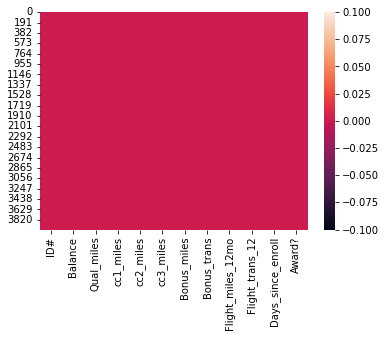

In [6]:
inspection(eastWest_data)

In [7]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x) 

In [8]:
df_norm = norm_func(eastWest_data.iloc[:,1:])
df_norm
 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [9]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data = pd.DataFrame(trans.fit_transform(eastWest_data.iloc[:,1:]))
data  

,0,1,2,3,4,5,6,7,8,9,10
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


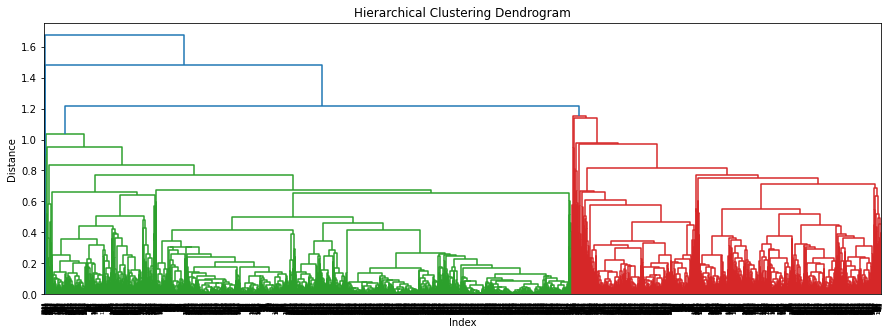

In [10]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df_norm, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()    

In [11]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5, linkage='complete',affinity = "euclidean").fit(df_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
eastWest_data['clust']=cluster_labels # creating a  new column and assigning it to new column 
eastWest_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [12]:
eastWest_data['clust'].unique()

array([0, 1, 2, 4, 3], dtype=int64)

In [14]:
eastWest_data.iloc[:,1:].groupby(ew_reset.clust).mean()

NameError: name 'ew_reset' is not defined

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
eastWest_data_subset = pd.DataFrame(scaler.fit_transform(eastWest_data.iloc[:,1:7]))
eastWest_data_subset  

,0,1,2,3,4,5
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121
...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286


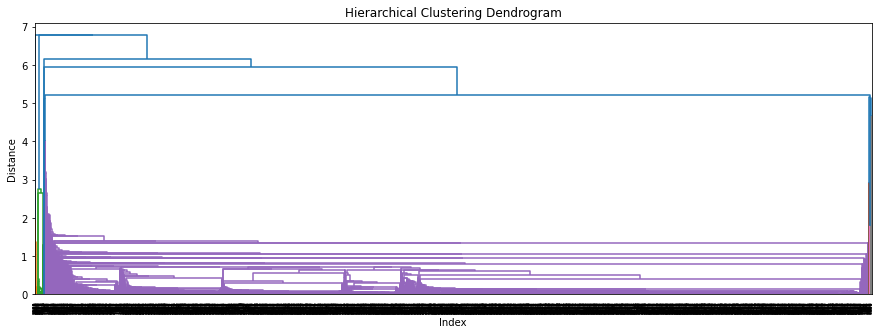

In [17]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(eastWest_data_subset, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()  

In [19]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5, linkage='complete',affinity = "euclidean").fit(eastWest_data) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
eastWest_data['clust']=cluster_labels # creating a  new column and assigning it to new column 
eastWest_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [20]:
eastWest_data['clust'].unique()

array([1, 2, 0, 4, 3], dtype=int64)

In [21]:
data = eastWest_data[(eastWest_data.clust==0)]
data 

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
43,44,619393,0,3,1,1,15008,14,0,0,7819,1,0
87,90,609477,0,3,1,1,21422,22,1200,8,6820,0,0
117,120,969559,0,1,1,1,2500,3,1000,2,7718,1,0
126,129,602064,0,5,1,1,194753,26,2250,10,7652,1,0
151,154,930410,0,5,1,1,211284,18,2250,6,7640,1,0
186,190,707079,0,4,1,1,57173,40,3450,12,7523,1,0
313,317,714717,0,5,1,1,119162,20,1750,4,7183,1,0
318,322,766419,0,1,1,1,11398,3,398,1,7162,1,0
410,416,620498,0,5,1,1,25395,53,1750,14,8296,1,0
471,477,743745,2066,1,1,1,4100,20,2500,18,8228,1,0


In [22]:
data = eastWest_data[(eastWest_data.clust==1)]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [23]:
data = eastWest_data[(eastWest_data.clust==2)]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,2
32,33,276571,0,4,1,1,42044,23,0,0,7872,0,2
45,46,288865,967,1,1,1,23600,14,2000,4,6884,1,2
63,64,362642,0,1,1,1,28079,8,0,0,6835,0,2
72,74,550367,0,3,1,1,12500,13,50,1,7801,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3040,3062,449205,1121,1,1,1,4750,9,3250,8,3071,1,2
3137,3159,298505,0,5,1,1,130647,32,600,2,2483,1,2
3235,3257,287033,0,1,1,1,26161,58,12873,53,2272,1,2
3315,3338,298927,0,5,1,1,69449,27,150,3,2047,0,2


In [24]:
data = eastWest_data[(eastWest_data.clust==3)]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
275,279,1704838,0,1,1,1,17108,32,4823,23,7283,1,3


In [25]:
data = eastWest_data[(eastWest_data.clust==4)]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
220,224,1302051,2706,5,1,1,90653,32,3050,7,7467,1,4
466,472,1113394,2015,5,1,1,60883,26,2600,9,8228,1,4
481,487,1125076,0,3,1,1,23046,14,0,0,8107,0,4
488,494,1199220,2919,1,1,1,3800,19,3300,18,8023,1,4


In [26]:
data = eastWest_data[(eastWest_data.clust==4)]
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
220,224,1302051,2706,5,1,1,90653,32,3050,7,7467,1,4
466,472,1113394,2015,5,1,1,60883,26,2600,9,8228,1,4
481,487,1125076,0,3,1,1,23046,14,0,0,8107,0,4
488,494,1199220,2919,1,1,1,3800,19,3300,18,8023,1,4
